In [2]:
from __future__ import print_function, division
from builtins import range

from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np

#from __future__ import print_function, division
from future.utils import iteritems
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [3]:
data = pd.read_csv('spambase.data').values # use pandas for convenience
np.random.shuffle(data) # shuffle each row in-place, but preserve the row

In [4]:
X = data[:,:48]
Y = data[:,-1]

In [5]:
# last 100 rows will be test
Xtrain = X[:-100,]
Ytrain = Y[:-100,]
Xtest = X[-100:,]
Ytest = Y[-100:,]

In [6]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Classification rate for NB:", model.score(Xtest, Ytest))

Classification rate for NB: 0.85


In [7]:
##### you can use ANY model! #####
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(Xtrain, Ytrain)
print("Classification rate for AdaBoost:", model.score(Xtest, Ytest))

Classification rate for AdaBoost: 0.88


# Example two

### load dataset

In [8]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# rename columns to something better
df.columns = ['labels', 'data']

# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [9]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

## Processing the data
### the difference between CountVectorizer and TfidfVectorizer?
The only difference is that the TfidfVectorizer() returns floats while the CountVectorizer() returns ints. And that's to be expected – as explained in the documentation quoted above, TfidfVectorizer() assigns a score while CountVectorizer() counts.


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# try multiple ways of calculating features
tfidf = TfidfVectorizer(decode_error='ignore')
Xtrain = tfidf.fit_transform(df_train)
Xtest = tfidf.transform(df_test)

## Create the model

In [12]:
# create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))




train score: 0.970800964371819
test score: 0.9510603588907015


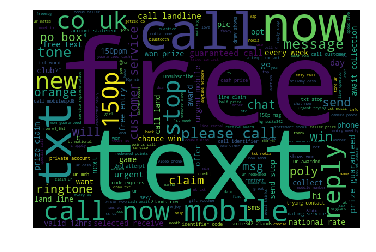

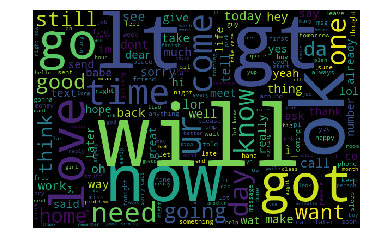

In [13]:
# visualize the data
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

visualize('spam')
visualize('ham')


In [15]:
# see what we're getting wrong
df['predictions'] = model.predict(X)

# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)
 
# things that should not be spam
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
    print(msg)




ValueError: shapes (4600,48) and (6951,2) not aligned: 48 (dim 1) != 6951 (dim 0)